In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00


In [ ]:
# ================= Imports =================
import torch
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO

# ================= Device =================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ================= Load YOLO =================
yolo_model = YOLO("/content/drive/MyDrive/nhandangmau/weight/best_yolov8n.pt")
yolo_model.to(device)

# ================= Load MobileNet =================
weights = MobileNet_V2_Weights.IMAGENET1K_V1
mobilenet = mobilenet_v2(weights=weights)
num_classes = 43  # số lớp biển báo
mobilenet.classifier = torch.nn.Sequential(torch.nn.Dropout(0.3),
                                           torch.nn.Linear(1280, num_classes))
mobilenet.load_state_dict(torch.load("/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth", map_location=device))
mobilenet.to(device)
mobilenet.eval()

# ================= Transform MobileNet =================
base_tf = weights.transforms()
tf_mobilenet = transforms.Compose([
    transforms.Resize((224,224)),
    base_tf
])


Device: cuda


NameError: name 'mobilenet_v2' is not defined

Saving 11.PNG to 11.PNG

0: 224x192 1 11, 9.1ms
Speed: 0.9ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 192)
Detected 1 objects
Object 1: Predicted class ID = 11


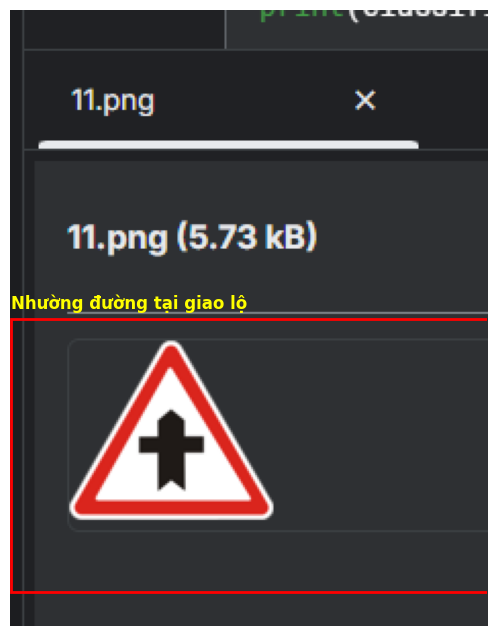

In [ ]:
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for fn in uploaded.keys():
    img_path = fn
    img = Image.open(img_path).convert("RGB")

    # ================= YOLO detect =================
    results = yolo_model(img)  # detect
    boxes = results[0].boxes.xyxy.cpu().numpy()
    print(f"Detected {len(boxes)} objects")

    # ================= Crop & classify =================
    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            out = mobilenet(x)
            pred_class = out.argmax(1).item()
        print(f"Object {i+1}: Predicted class ID = {pred_class}")

# Vẽ ảnh gốc
fig, ax = plt.subplots(1, figsize=(10,8))
ax.imshow(img)

# Vẽ từng bbox + label
class_names = {
    0: 'Giới hạn tốc độ (20km/h)',
    1: 'Giới hạn tốc độ (30km/h)',
    2: 'Giới hạn tốc độ (50km/h)',
    3: 'Giới hạn tốc độ (60km/h)',
    4: 'Giới hạn tốc độ (70km/h)',
    5: 'Giới hạn tốc độ (80km/h)',
    6: 'Hết giới hạn tốc độ (80km/h)',
    7: 'Giới hạn tốc độ (100km/h)',
    8: 'Giới hạn tốc độ (120km/h)',
    9: 'Cấm vượt',
    10: 'Cấm vượt xe > 3.5 tấn',
    11: 'Nhường đường tại giao lộ',
    12: 'Đường ưu tiên',
    13: 'Nhường đường',
    14: 'Dừng lại',
    15: 'Cấm tất cả các loại xe',
    16: 'Cấm xe > 3.5 tấn',
    17: 'Cấm vào',
    18: 'Chú ý chung',
    19: 'Đường cong nguy hiểm sang trái',
    20: 'Đường cong nguy hiểm sang phải',
    21: 'Đường cong đôi',
    22: 'Đường gập ghềnh',
    23: 'Đường trơn trượt',
    24: 'Đường hẹp bên phải',
    25: 'Công trường',
    26: 'Đèn tín hiệu',
    27: 'Người đi bộ',
    28: 'Trẻ em qua đường',
    29: 'Người đi xe đạp qua đường',
    30: 'Chú ý băng/đá',
    31: 'Động vật hoang dã qua đường',
    32: 'Hết giới hạn tốc độ + cấm vượt',
    33: 'Rẽ phải phía trước',
    34: 'Rẽ trái phía trước',
    35: 'Chỉ đi thẳng',
    36: 'Đi thẳng hoặc rẽ phải',
    37: 'Đi thẳng hoặc rẽ trái',
    38: 'Giữ bên phải',
    39: 'Giữ bên trái',
    40: 'Đi vòng xuyến bắt buộc',
    41: 'Hết cấm vượt',
    42: 'Hết cấm vượt xe > 3.5 tấn'}
for i, box in enumerate(boxes):
    xmin, ymin, xmax, ymax = [int(b) for b in box]
    width, height = xmax-xmin, ymax-ymin
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Label
    pred_class_name = class_names.get(pred_class, str(pred_class))
    ax.text(xmin, ymin-5, pred_class_name, color='yellow', fontsize=12, weight='bold')

plt.axis('off')
plt.show()


In [ ]:
import torch

# ================= Device =================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In [ ]:
from ultralytics import YOLO

yolo_model = YOLO("yolo11n.pt")
yolo_model.to(device)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

Device: cuda


Saving images.jpg to images (2).jpg

0: 384x640 2 cars, 1 bus, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Detected 3 objects
Detected 2 circular objects
Circular Object 2: Predicted class ID = 40
Circular Object 3: Predicted class ID = 13


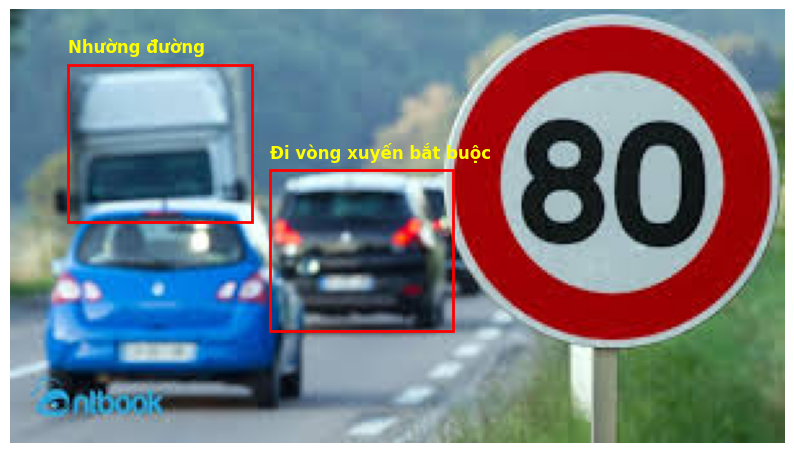

In [ ]:
# ================= Imports =================
import torch
from torchvision import transforms, models
from torchvision.models import MobileNet_V2_Weights
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import files

# ================= Device =================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ================= Load YOLOv11 =================
yolo_model = YOLO("yolo11n.pt")  # hoặc đường dẫn đến weights của bạn
yolo_model.to(device)

# ================= Load MobileNetV2 =================
num_classes = 43  # số lớp biển báo

# Load pretrained weights
weights = MobileNet_V2_Weights.IMAGENET1K_V1
mobilenet = models.mobilenet_v2(weights=weights)

# Thay classifier theo số lớp
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, num_classes)
)

# Load custom weights
mobilenet.load_state_dict(torch.load("/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth", map_location=device))
mobilenet.to(device)
mobilenet.eval()

# ================= Transform MobileNet =================
base_tf = weights.transforms()
tf_mobilenet = transforms.Compose([
    transforms.Resize((224,224)),
    base_tf
])

# ================= Upload & Process Images =================
uploaded = files.upload()

# Class names tiếng Việt
class_names = {
    0: 'Giới hạn tốc độ (20km/h)', 1: 'Giới hạn tốc độ (30km/h)', 2: 'Giới hạn tốc độ (50km/h)',
    3: 'Giới hạn tốc độ (60km/h)', 4: 'Giới hạn tốc độ (70km/h)', 5: 'Giới hạn tốc độ (80km/h)',
    6: 'Hết giới hạn tốc độ (80km/h)', 7: 'Giới hạn tốc độ (100km/h)', 8: 'Giới hạn tốc độ (120km/h)',
    9: 'Cấm vượt', 10: 'Cấm vượt xe > 3.5 tấn', 11: 'Nhường đường tại giao lộ',
    12: 'Đường ưu tiên', 13: 'Nhường đường', 14: 'Dừng lại', 15: 'Cấm tất cả các loại xe',
    16: 'Cấm xe > 3.5 tấn', 17: 'Cấm vào', 18: 'Chú ý chung', 19: 'Đường cong nguy hiểm sang trái',
    20: 'Đường cong nguy hiểm sang phải', 21: 'Đường cong đôi', 22: 'Đường gập ghềnh',
    23: 'Đường trơn trượt', 24: 'Đường hẹp bên phải', 25: 'Công trường', 26: 'Đèn tín hiệu',
    27: 'Người đi bộ', 28: 'Trẻ em qua đường', 29: 'Người đi xe đạp qua đường', 30: 'Chú ý băng/đá',
    31: 'Động vật hoang dã qua đường', 32: 'Hết giới hạn tốc độ + cấm vượt', 33: 'Rẽ phải phía trước',
    34: 'Rẽ trái phía trước', 35: 'Chỉ đi thẳng', 36: 'Đi thẳng hoặc rẽ phải', 37: 'Đi thẳng hoặc rẽ trái',
    38: 'Giữ bên phải', 39: 'Giữ bên trái', 40: 'Đi vòng xuyến bắt buộc', 41: 'Hết cấm vượt',
    42: 'Hết cấm vượt xe > 3.5 tấn'
}

# ================= Detect + Classify + Draw (chỉ vật hình tròn) =================
for fn in uploaded.keys():
    img_path = fn
    img = Image.open(img_path).convert("RGB")

    # --- YOLO detect ---
    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    print(f"Detected {len(boxes)} objects")

    # --- Lọc các bbox gần hình tròn ---
    circular_boxes = []
    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        width, height = xmax-xmin, ymax-ymin
        aspect_ratio = width / height
        if 0.8 <= aspect_ratio <= 1.2:  # gần hình vuông -> coi là tròn
            circular_boxes.append((i, box))

    print(f"Detected {len(circular_boxes)} circular objects")

    # --- Crop & classify chỉ các object tròn ---
    circular_pred_classes = []
    for idx, box in circular_boxes:
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            out = mobilenet(x)
            pred_class = out.argmax(1).item()
        circular_pred_classes.append((box, pred_class))
        print(f"Circular Object {idx+1}: Predicted class ID = {pred_class}")

    # --- Vẽ kết quả ---
    fig, ax = plt.subplots(1, figsize=(10,8))
    ax.imshow(img)

    for box, pred_class in circular_pred_classes:
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        width, height = xmax-xmin, ymax-ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        pred_class_name = class_names.get(pred_class, str(pred_class))
        ax.text(xmin, ymin-5, pred_class_name, color='yellow', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()


In [ ]:
import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image
from ultralytics import YOLO
import numpy as np
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load YOLO
yolo_model = YOLO("yolo11n.pt")
yolo_model.to(device)

# Load MobileNetV2 fine-tuned 43 lớp
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load("/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth", map_location=device))
mobilenet.to(device)
mobilenet.eval()

# Embedding extractor
class MobileNetEmbedding(torch.nn.Module):
    def __init__(self, trained_model):
        super().__init__()
        self.features = trained_model.features
        self.pool = torch.nn.AdaptiveAvgPool2d((1,1))
    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return x

embedding_model = MobileNetEmbedding(mobilenet).to(device)
embedding_model.eval()

# Transform
weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224,224)),
    weights.transforms()
])

# DB embeddings path
db_path = "/content/drive/MyDrive/nhandangmau/db_embeddings.npy"

# Load DB nếu có
if os.path.exists(db_path):
    db = np.load(db_path, allow_pickle=True).item()
else:
    db = {}


In [ ]:
from google.colab import files

print("Upload images to add to DB")
uploaded = files.upload()

for fn in uploaded.keys():
    img = Image.open(fn).convert("RGB")
    x = tf_mobilenet(img).unsqueeze(0).to(device)

    with torch.no_grad():
        emb = embedding_model(x).cpu().numpy()[0]

    db[fn] = emb
    print(f"Added {fn} to DB")

np.save(db_path, db)
print("DB saved to", db_path)


Upload images to add to DB


Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png
Saving 10.png to 10.png
Saving 11.png to 11.png
Saving 12.png to 12.png
Saving 13.png to 13.png
Saving 14.png to 14.png
Saving 15.png to 15.png
Saving 16.png to 16.png
Saving 17.png to 17.png
Saving 18.png to 18.png
Saving 19.png to 19.png
Saving 20.png to 20.png
Saving 21.png to 21.png
Saving 22.png to 22.png
Saving 23.png to 23.png
Saving 24.png to 24.png
Saving 25.png to 25.png
Saving 26.png to 26.png
Saving 27.png to 27.png
Saving 28.png to 28.png
Saving 29.png to 29.png
Saving 30.png to 30.png
Saving 31.png to 31.png
Saving 32.png to 32.png
Saving 33.png to 33.png
Saving 34.png to 34.png
Saving 35.png to 35.png
Saving 36.png to 36.png
Saving 37.png to 37.png
Saving 38.png to 38.png
Saving 39.png to 39.png
Saving 40.png to 40.png
Saving 41.png to 41.png
Saving 42.pn

In [ ]:
from google.colab import files

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def match_embedding(query_vec, db):
    if not db:
        return None, 0
    names = list(db.keys())
    vectors = np.array(list(db.values()))
    sims = np.array([cosine_similarity(query_vec, v) for v in vectors])
    best_idx = np.argmax(sims)
    return names[best_idx], sims[best_idx]

print("Upload images to detect and match with DB")
uploaded = files.upload()

for fn in uploaded.keys():
    img = Image.open(fn).convert("RGB")

    # YOLO detect
    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    print(f"Detected {len(boxes)} objects")

    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            emb = embedding_model(x).cpu().numpy()[0]

        best_name, score = match_embedding(emb, db)
        if best_name:
            print(f"Object {i+1}: Best match = {best_name}, similarity = {score:.4f}")
        else:
            print(f"Object {i+1}: No images in DB yet")


Upload images to detect and match with DB


Saving images.jpg to images (1).jpg

0: 384x640 2 cars, 1 bus, 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Detected 3 objects
Object 1: Best match = 7.png, similarity = 0.5995
Object 2: Best match = 3.png, similarity = 0.6009
Object 3: Best match = 17.png, similarity = 0.6336


In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
import torch

# --- Hàm cosine similarity ---
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# --- Hàm match với DB ---
def match_embedding(query_vec, db):
    if not db:
        return None, 0
    names = list(db.keys())
    vectors = np.array(list(db.values()))
    sims = np.array([cosine_similarity(query_vec, v) for v in vectors])
    best_idx = np.argmax(sims)
    return names[best_idx], sims[best_idx]

# --- Upload ảnh ---
print("Upload images to match with DB")
uploaded = files.upload()

for fn in uploaded.keys():
    img = Image.open(fn).convert("RGB")

    # --- Transform và extract embedding ---
    x = tf_mobilenet(img).unsqueeze(0).to(device)
    with torch.no_grad():
        emb = embedding_model(x).cpu().numpy()[0]

    # --- So khớp với DB ---
    best_name, score = match_embedding(emb, db)
    if best_name:
        print(f"Image {fn}: Best match in DB = {best_name}, similarity = {score:.4f}")
    else:
        print(f"Image {fn}: No images in DB yet")


Upload images to match with DB


Saving images.jpg to images.jpg
Image images.jpg: Best match in DB = 5.png, similarity = 0.7757


#  Test yolov8n.pt

In [ ]:
import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image
from ultralytics import YOLO
import numpy as np
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ============================================================
# Load YOLO (dùng model đã huấn luyện sẵn)
# ============================================================
yolo_weight_path = "/content/drive/MyDrive/nhandangmau/weight/best_yolov8n.pt"
yolo_model = YOLO(yolo_weight_path)
yolo_model.to(device)
print(f"✅ YOLO model loaded from: {yolo_weight_path}")

# ============================================================
# Load MobileNetV2 fine-tuned cho 43 lớp
# ============================================================
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load(
    "/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth",
    map_location=device
))
mobilenet.to(device)
mobilenet.eval()
print("✅ MobileNetV2 model loaded and ready.")

# ============================================================
# Định nghĩa lớp trích xuất đặc trưng (embedding extractor)
# ============================================================
class MobileNetEmbedding(torch.nn.Module):
    def __init__(self, trained_model):
        super().__init__()
        self.features = trained_model.features
        self.pool = torch.nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return x

embedding_model = MobileNetEmbedding(mobilenet).to(device)
embedding_model.eval()

# ============================================================
# Transform cho ảnh đầu vào MobileNet
# ============================================================
weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224, 224)),
    weights.transforms()
])

# ============================================================
# Load hoặc khởi tạo Database embeddings
# ============================================================
db_path = "/content/drive/MyDrive/nhandangmau/db_embeddings.npy"

if os.path.exists(db_path):
    db = np.load(db_path, allow_pickle=True).item()
    print(f"📂 Loaded existing DB with {len(db)} embeddings.")
else:
    db = {}
    print("📂 No existing DB found. Creating new one.")

# ============================================================
# Thêm ảnh mới vào DB
# ============================================================
# from google.colab import files

# print("\n📤 Upload images to add to DB")
# uploaded = files.upload()

# for fn in uploaded.keys():
#     img = Image.open(fn).convert("RGB")
#     x = tf_mobilenet(img).unsqueeze(0).to(device)

#     with torch.no_grad():
#         emb = embedding_model(x).cpu().numpy()[0]

#     db[fn] = emb
#     print(f"✅ Added {fn} to DB")

# np.save(db_path, db)
# print(f"💾 DB saved to {db_path}")

# ============================================================
# Hàm so sánh và tìm ảnh tương đồng
# ============================================================
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def match_embedding(query_vec, db):
    if not db:
        return None, 0
    names = list(db.keys())
    vectors = np.array(list(db.values()))
    sims = np.array([cosine_similarity(query_vec, v) for v in vectors])
    best_idx = np.argmax(sims)
    return names[best_idx], sims[best_idx]

# ============================================================
# Nhận dạng ảnh mới và so khớp với DB
# ============================================================
print("\n📤 Upload images to detect and match with DB")
uploaded = files.upload()

for fn in uploaded.keys():
    img = Image.open(fn).convert("RGB")

    # YOLO detect
    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    print(f"\n📸 Detected {len(boxes)} objects in {fn}")

    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            emb = embedding_model(x).cpu().numpy()[0]

        best_name, score = match_embedding(emb, db)
        if best_name:
            print(f"🔹 Object {i+1}: Best match = {best_name}, similarity = {score:.4f}")
        else:
            print(f"🔹 Object {i+1}: No images in DB yet")


✅ YOLO model loaded from: /content/drive/MyDrive/nhandangmau/weight/best_yolov8n.pt
✅ MobileNetV2 model loaded and ready.
📂 Loaded existing DB with 44 embeddings.

📤 Upload images to detect and match with DB


Saving cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092.jpg to cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092 (5).jpg

0: 128x224 1 2, 38.5ms
Speed: 0.8ms preprocess, 38.5ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 224)

📸 Detected 1 objects in cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092 (5).jpg
🔹 Object 1: Best match = 2.png, similarity = 0.8438


✅ YOLO model loaded from: /content/drive/MyDrive/nhandangmau/weight/best_yolov8n.pt
✅ MobileNetV2 model loaded.
📂 Loaded existing DB with 44 embeddings.

📤 Upload images to detect and match with DB


Saving 11.PNG to 11 (4).PNG

0: 224x192 1 11, 8.3ms
Speed: 0.7ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 192)

📸 Detected 1 objects in 11 (4).PNG
🔹 Object 1: 11 (0.78)


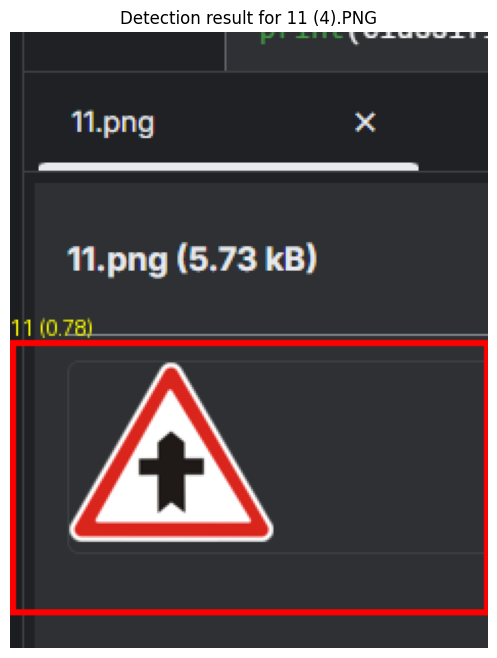

In [ ]:
import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
import numpy as np
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ============================================================
# Load YOLO (model bạn đã train)
# ============================================================
yolo_weight_path = "/content/drive/MyDrive/nhandangmau/weight/best_yolov8n.pt"
yolo_model = YOLO(yolo_weight_path)
yolo_model.to(device)
print(f"✅ YOLO model loaded from: {yolo_weight_path}")

# ============================================================
# Load MobileNetV2 fine-tuned 43 lớp
# ============================================================
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load(
    "/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth",
    map_location=device
))
mobilenet.to(device)
mobilenet.eval()
print("✅ MobileNetV2 model loaded.")

# ============================================================
# Embedding extractor
# ============================================================
class MobileNetEmbedding(torch.nn.Module):
    def __init__(self, trained_model):
        super().__init__()
        self.features = trained_model.features
        self.pool = torch.nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return x

embedding_model = MobileNetEmbedding(mobilenet).to(device)
embedding_model.eval()

# ============================================================
# Transform cho MobileNet
# ============================================================
weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224, 224)),
    weights.transforms()
])

# ============================================================
# Load hoặc tạo DB
# ============================================================
db_path = "/content/drive/MyDrive/nhandangmau/db_embeddings.npy"
if os.path.exists(db_path):
    db = np.load(db_path, allow_pickle=True).item()
    print(f"📂 Loaded existing DB with {len(db)} embeddings.")
else:
    db = {}
    print("📂 No DB found. Creating new one.")

# ============================================================
# Hàm tính cosine similarity
# ============================================================
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def match_embedding(query_vec, db):
    if not db:
        return None, 0
    names = list(db.keys())
    vectors = np.array(list(db.values()))
    sims = np.array([cosine_similarity(query_vec, v) for v in vectors])
    best_idx = np.argmax(sims)
    return names[best_idx], sims[best_idx]

# ============================================================
# Upload ảnh để nhận dạng
# ============================================================
from google.colab import files

print("\n📤 Upload images to detect and match with DB")
uploaded = files.upload()

for fn in uploaded.keys():
    img = Image.open(fn).convert("RGB")

    # YOLO detect
    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    cls_ids = results[0].boxes.cls.cpu().numpy().astype(int)
    names = results[0].names
    print(f"\n📸 Detected {len(boxes)} objects in {fn}")

    draw = ImageDraw.Draw(img)

    for i, (box, cls_id) in enumerate(zip(boxes, cls_ids)):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))

        # Lấy vector đặc trưng của đối tượng
        x = tf_mobilenet(crop).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = embedding_model(x).cpu().numpy()[0]

        # So khớp với DB
        best_name, score = match_embedding(emb, db)

        # Tên lớp từ YOLO
        class_name = names[cls_id] if names and cls_id in names else f"cls_{cls_id}"

        # Hiển thị thông tin
        label = f"{class_name} ({score:.2f})" if best_name else class_name
        print(f"🔹 Object {i+1}: {label}")

        # Vẽ khung + nhãn
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        font = ImageFont.load_default()
        text_y = ymin - 12 if ymin > 12 else ymin + 5
        draw.text((xmin, text_y), label, fill="yellow", font=font)

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Detection result for {fn}")
    plt.show()


# Fine tune yolov8n

In [ ]:
!pip install ultralytics


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dHs1zwg6bZ079Id3qUJD")
project = rf.workspace("vkr-final").project("traffic-signs-classification-vmxtz")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 137.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-signs-classification-1 in yolov8::  46%|████▋     | 6473/13982 [00:01<00:01, 6417.98it/s]


KeyboardInterrupt: 

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="dHs1zwg6bZ079Id3qUJD")
project = rf.workspace("vkr-final").project("traffic-signs-classification-vmxtz")
version = project.version(1)

# Tải dataset YOLOv8 và lưu vào vị trí mới
dataset = version.download("yolov8", location="/content/drive/MyDrive/TrafficSignsDataset")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/drive/MyDrive/TrafficSignsDataset in yolov8:: 100%|██████████| 13982/13982 [01:53<00:00, 123.33it/s]


In [ ]:
# 1️⃣ Load model YOLOv8 gốc (phiên bản nhỏ, nhanh)
model = YOLO("yolov8n.pt")

# 2️⃣ Huấn luyện fine-tune trên dataset biển báo giao thông
results = model.train(
    data="/content/drive/MyDrive/TrafficSignsDataset/data.yaml",  # đường dẫn file YAML của dataset Roboflow
    epochs=50,                 # số epoch huấn luyện
    imgsz=640,                 # kích thước ảnh input
    batch=16,                  # batch size
    name="yolov8n_traffic_signs_finetune_v2",  # tên thư mục lưu kết quả (sẽ tạo trong runs/detect/)
    device=0,                  # dùng GPU đầu tiên (0)
    workers=4,                 # số luồng đọc dữ liệu
    patience=10,               # dừng sớm nếu không cải thiện sau 10 epoch
    project="/content/yolo_results",  # 🟩 đường dẫn lưu thư mục kết quả (bạn có thể đổi chỗ lưu)
    pretrained=True            # dùng trọng số pretrained để fine-tune
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/TrafficSignsDataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_traffic_signs_finetune_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, 

# **Predict**

In [ ]:
import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load(
    "/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth",
    map_location=device
))
mobilenet.to(device)
mobilenet.eval()
print("MobileNetV2 model loaded for embedding extraction.")
class MobileNetEmbedding(torch.nn.Module):
    def __init__(self, trained_model):
        super().__init__()
        self.features = trained_model.features
        self.pool = torch.nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return x

embedding_model = MobileNetEmbedding(mobilenet).to(device)
embedding_model.eval()

weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224, 224)),
    weights.transforms()
])


dataset_dir = "/content/drive/MyDrive/nhandangmau/Meta"
save_path = "/content/drive/MyDrive/nhandangmau/db_test.npy"

db = {}
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    embeddings = []
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tif", ".webp"))]

    if len(image_files) == 0:
        print(f" No images found in {class_name}")
        continue

    print(f" Extracting features for class: {class_name} ({len(image_files)} images)")

    for img_name in tqdm(image_files, desc=f"Class {class_name}"):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path).convert("RGB")
        except:
            print(f" Failed to open image: {img_name}")
            continue

        x = tf_mobilenet(img).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = embedding_model(x).cpu().numpy()[0]
        embeddings.append(emb)

    if embeddings:
        db[class_name] = np.mean(embeddings, axis=0)
        print(f" Saved embedding for class '{class_name}'")

np.save(save_path, db)
print(f"\n Saved DB with {len(db)} classes to: {save_path}")


🚀 Using device: cuda
✅ MobileNetV2 model loaded for embedding extraction.

💾 Saved DB with 0 classes to: /content/drive/MyDrive/nhandangmau/db_test.npy


In [ ]:
!pip install ultralytics pillow-heif --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.8 MB/s eta 0:00:00


 Using device: cuda
YOLO model loaded from: /content/drive/MyDrive/nhandangmau/nhandangmau/weight/yolov8n_best.pt
MobileNetV2 model loaded.
 Loaded existing DB with 44 embeddings.

 Upload images to detect and match with DB


Saving cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092.jpg to cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092 (2).jpg

 Processing: cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092 (2).jpg

0: 384x640 1 2, 1 5, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
 Detected 2 objects in cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092 (2).jpg
🔹 Object 1: 2 (0.83)
🔹 Object 2: 5 (0.84)


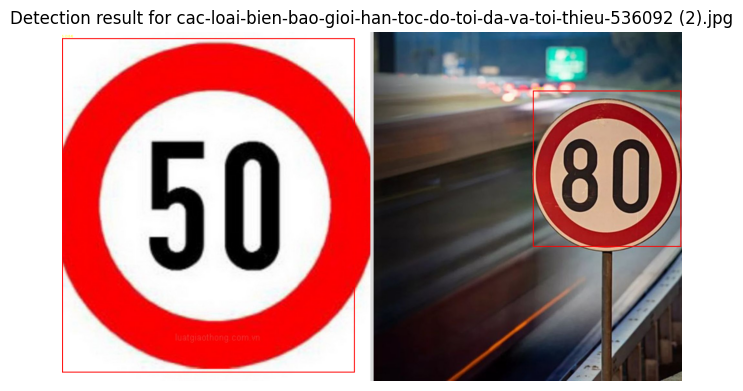

In [ ]:


import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image, ImageDraw, ImageFont, UnidentifiedImageError
import io
import numpy as np
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pillow_heif import register_heif_opener
from google.colab import files

register_heif_opener()  # Cho phép PIL mở file HEIC/HEIF
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

yolo_weight_path = "/content/drive/MyDrive/nhandangmau/nhandangmau/weight/yolov8n_best.pt"
yolo_model = YOLO(yolo_weight_path)
yolo_model.to(device)
print(f"YOLO model loaded from: {yolo_weight_path}")

mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load(
    "/content/drive/MyDrive/nhandangmau/nhandangmau/weight/mobilenetv2_test.pth",
    map_location=device
))
mobilenet.to(device)
mobilenet.eval()
print("MobileNetV2 model loaded.")

class MobileNetEmbedding(torch.nn.Module):
    def __init__(self, trained_model):
        super().__init__()
        self.features = trained_model.features
        self.pool = torch.nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return x

embedding_model = MobileNetEmbedding(mobilenet).to(device)
embedding_model.eval()

weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224, 224)),
    weights.transforms()
])
db_path = "/content/drive/MyDrive/nhandangmau/nhandangmau/db_embeddings.npy"
if os.path.exists(db_path):
    db = np.load(db_path, allow_pickle=True).item()
    print(f" Loaded existing DB with {len(db)} embeddings.")
else:
    db = {}
    print(" No DB found. Creating new one.")

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def match_embedding(query_vec, db):
    if not db:
        return None, 0
    names = list(db.keys())
    vectors = np.array(list(db.values()))
    sims = np.array([cosine_similarity(query_vec, v) for v in vectors])
    best_idx = np.argmax(sims)
    return names[best_idx], sims[best_idx]

print("\n Upload images to detect and match with DB")
uploaded = files.upload()

SUPPORTED_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tif", ".tiff", ".jfif", ".webp", ".ico", ".heic")

for fn, content in uploaded.items():
    ext = os.path.splitext(fn)[1].lower()
    print(f"\n Processing: {fn}")

    if ext not in SUPPORTED_EXTS:
        print(f" Unsupported extension '{ext}'. Trying to open as image anyway...")

    try:
        img = Image.open(io.BytesIO(content)).convert("RGB")
    except UnidentifiedImageError:
        print(f" Error: {fn} is not a valid image or unsupported format.")
        continue
    except Exception as e:
        print(f" Failed to load {fn}: {e}")
        continue

    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    cls_ids = results[0].boxes.cls.cpu().numpy().astype(int)
    names = results[0].names
    print(f" Detected {len(boxes)} objects in {fn}")

    draw = ImageDraw.Draw(img)

    for i, (box, cls_id) in enumerate(zip(boxes, cls_ids)):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = embedding_model(x).cpu().numpy()[0]

        best_name, score = match_embedding(emb, db)
        class_name = names[cls_id] if names and cls_id in names else f"cls_{cls_id}"
        label = f"{class_name} ({score:.2f})" if best_name else class_name

        print(f"🔹 Object {i+1}: {label}")
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        font = ImageFont.load_default()
        text_y = ymin - 12 if ymin > 12 else ymin + 5
        draw.text((xmin, text_y), label, fill="yellow", font=font)

    plt.figure(figsize=(8, 8))

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Detection result for {fn}")
    plt.show()


Using device: cuda
YOLO model loaded from: /content/drive/MyDrive/nhandangmau/nhandangmau/weight/yolov8n_best.pt
MobileNetV2 model loaded for classification.

Upload images to detect and classify


Saving cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092.jpg to cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092.jpg

Processing: cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092.jpg

0: 384x640 1 2, 1 5, 13.7ms
Speed: 3.2ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Detected 2 objects in cac-loai-bien-bao-gioi-han-toc-do-toi-da-va-toi-thieu-536092.jpg
🔹 Object 1: class_5 
🔹 Object 2: class_2 


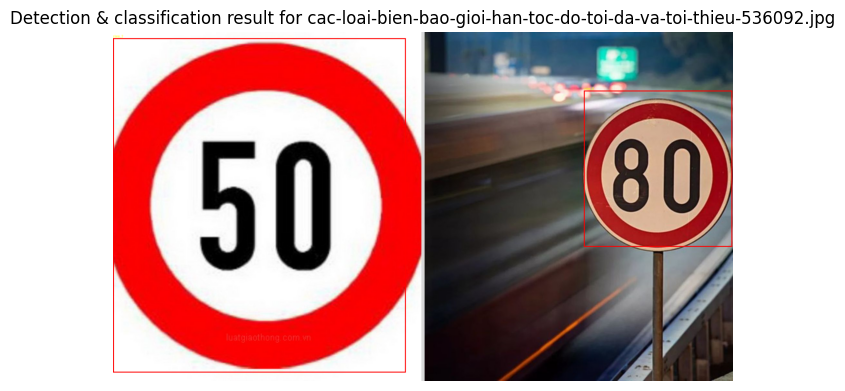

In [ ]:
import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image, ImageDraw, ImageFont, UnidentifiedImageError
import io
import numpy as np
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pillow_heif import register_heif_opener
from google.colab import files

register_heif_opener()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Load YOLO ---
yolo_weight_path = "/content/drive/MyDrive/nhandangmau/nhandangmau/weight/yolov8n_best.pt"
yolo_model = YOLO(yolo_weight_path).to(device)
print(f"YOLO model loaded from: {yolo_weight_path}")

# --- Load MobileNetV2 đã train ---
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load(
    "/content/drive/MyDrive/nhandangmau/nhandangmau/weight/mobilenetv2_test.pth",
    map_location=device
))
mobilenet.to(device)
mobilenet.eval()
print("MobileNetV2 model loaded for classification.")

# --- Chuẩn hóa đầu vào cho MobileNet ---
weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224, 224)),
    weights.transforms()
])

# --- Upload ảnh ---
print("\nUpload images to detect and classify")
uploaded = files.upload()
SUPPORTED_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tif", ".tiff", ".jfif", ".webp", ".ico", ".heic")

for fn, content in uploaded.items():
    ext = os.path.splitext(fn)[1].lower()
    print(f"\nProcessing: {fn}")

    if ext not in SUPPORTED_EXTS:
        print(f"Unsupported extension '{ext}'. Trying to open as image anyway...")

    try:
        img = Image.open(io.BytesIO(content)).convert("RGB")
    except UnidentifiedImageError:
        print(f"Error: {fn} is not a valid image or unsupported format.")
        continue
    except Exception as e:
        print(f"Failed to load {fn}: {e}")
        continue

    # --- YOLO detect ---
    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    cls_ids = results[0].boxes.cls.cpu().numpy().astype(int)
    names = results[0].names
    print(f"Detected {len(boxes)} objects in {fn}")

    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()

    for i, (box, cls_id) in enumerate(zip(boxes, cls_ids)):
        xmin, ymin, xmax, ymax = [int(b) for b in box]

        # --- Cắt vùng đối tượng ---
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        # --- Dự đoán bằng MobileNet ---
        with torch.no_grad():
            outputs = mobilenet(x)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            pred_cls = probs.argmax(dim=1).item()
            confidence = probs[0, pred_cls].item()

        class_name = f"class_{pred_cls}"  # hoặc map id → tên lớp nếu có file nhãn
        label = f"{class_name} "
        print(f"🔹 Object {i+1}: {label}")

        # --- Vẽ hộp & nhãn ---
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        text_y = ymin - 12 if ymin > 12 else ymin + 5
        draw.text((xmin, text_y), label, fill="yellow", font=font)

    # --- Hiển thị ---
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Detection & classification result for {fn}")
    plt.show()


In [ ]:
!pip install gradio ultralytics pillow torch torchvision pillow-heif


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.8 MB/s eta 0:00:00


In [ ]:
import torch
from torchvision import models, transforms
from torchvision.models import MobileNet_V2_Weights
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import gradio as gr
from ultralytics import YOLO
from pillow_heif import register_heif_opener

register_heif_opener()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load YOLO ---
yolo_weight_path = "/content/drive/MyDrive/nhandangmau/nhandangmau/weight/yolov8n_best.pt"
yolo_model = YOLO(yolo_weight_path).to(device)

# --- Load MobileNetV2 ---
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.3),
    torch.nn.Linear(1280, 43)
)
mobilenet.load_state_dict(torch.load(
    "/content/drive/MyDrive/nhandangmau/nhandangmau/weight/mobilenetv2_test.pth",
    map_location=device
))
mobilenet.to(device)
mobilenet.eval()

weights = MobileNet_V2_Weights.IMAGENET1K_V1
tf_mobilenet = transforms.Compose([
    transforms.Resize((224, 224)),
    weights.transforms()
])

# --- Hàm xử lý ảnh ---
def detect_and_classify(image):
    img = Image.fromarray(image).convert("RGB")
    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    cls_ids = results[0].boxes.cls.cpu().numpy().astype(int)
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()

    for i, (box, cls_id) in enumerate(zip(boxes, cls_ids)):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = mobilenet(x)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            pred_cls = probs.argmax(dim=1).item()
            conf = probs[0, pred_cls].item()

        label = f"Class {pred_cls}"
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        draw.text((xmin, max(0, ymin - 12)), label, fill="yellow", font=font)

    return np.array(img)

# --- Giao diện ---
demo = gr.Interface(
    fn=detect_and_classify,
    inputs=gr.Image(type="numpy", label="Tải ảnh lên"),
    outputs=gr.Image(label="Kết quả phát hiện & phân loại"),
    title="🚦 Nhận dạng biển báo giao thông (YOLO + MobileNetV2)",
    description="Tải ảnh lên để hệ thống phát hiện và phân loại biển báo giao thông."
)

demo.launch(debug=True, share=True)  # ⚠️ share=True sẽ tạo link công khai như localhost


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bb48c4f79ecf6c1c2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 416x640 (no detections), 69.9ms
Speed: 30.2ms preprocess, 69.9ms inference, 4.8ms postprocess per image at shape (1, 3, 416, 640)

0: 640x640 1 5, 9.3ms
Speed: 12.1ms preprocess, 9.3ms inference, 42.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 5, 8.3ms
Speed: 3.9ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
